<a href="https://colab.research.google.com/github/Anant-mishra1729/Machine-Learning-Notebooks/blob/main/Custom_loss_function_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import Loss
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

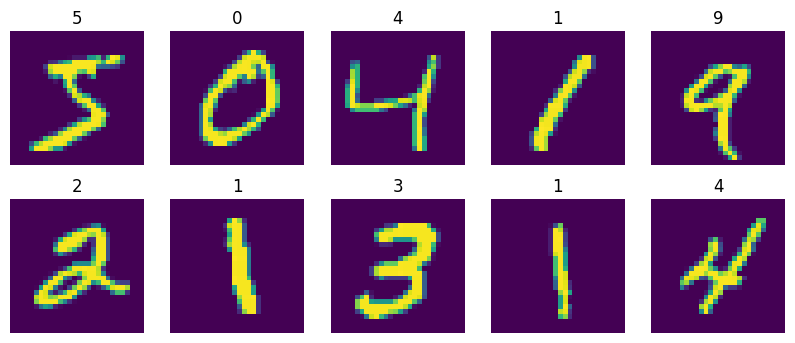

In [3]:
plt.figure(figsize = (10,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  ax.imshow(X_train[i])
  ax.set_axis_off()
  ax.set_title(y_train[i])

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# One hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Creating custom loss

In [8]:
# Define the custom categorical cross-entropy loss function
class CustomCategoricalCrossEntropy(Loss):
    def __init__(self, name='custom_categorical_crossentropy'):
        super().__init__(name=name)

    def call(self, y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        loss = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
        return loss

## Creating keras model

In [9]:
def getModel():
  model = tf.keras.Sequential([
      layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (28,28,1)),
      layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (28,28,1)),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(100,activation = 'relu'),
      layers.Dense(10,activation = 'softmax')
  ])
  customloss = CustomCategoricalCrossEntropy()
  model.compile(
      optimizer = 'adam',
      loss = customloss,
      metrics = ['accuracy']
  )
  return model

In [10]:
model = getModel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
history = model.fit(X_train,y_train, epochs = 6, validation_data = (X_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 27s 5ms/step - loss: 0.1212 - accuracy: 0.9632 - val_loss: 0.0436 - val_accuracy: 0.9847
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0411 - accuracy: 0.9880 - val_loss: 0.0348 - val_accuracy: 0.9889
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0445 - val_accuracy: 0.9868
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0277 - val_accuracy: 0.9912
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0269 - val_accuracy: 0.9917
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0257 - val_accuracy: 0.9930


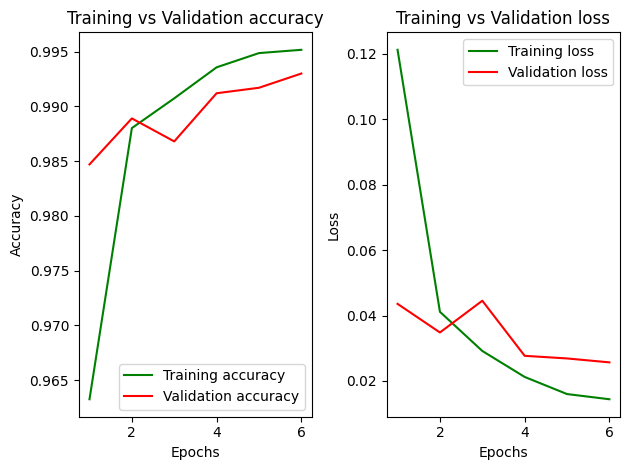

In [12]:
# Training history
def showHistory(epochs, history):
  # Accuracy
  plt.subplot(1,2,1)
  plt.plot(epochs,history['accuracy'], 'g'),
  plt.plot(epochs,history['val_accuracy'], 'r'),
  plt.title('Training vs Validation accuracy')
  plt.legend(['Training accuracy','Validation accuracy'])
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  # Loss
  plt.subplot(1,2,2)
  plt.plot(epochs, history['loss'],'g')
  plt.plot(epochs, history['val_loss'],'r')
  plt.title('Training vs Validation loss')
  plt.legend(['Training loss','Validation loss'])
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.tight_layout()
  plt.show()
showHistory(range(1,7),history.history)

In [13]:
print("Results:")
model.evaluate(X_test,y_test)

Results:
313/313 [==============================] - 1s 3ms/step - loss: 0.0257 - accuracy: 0.9930


[0.025675052776932716, 0.9929999709129333]